#### <span style="font-family:Arial; font-weight: 800; font-size:25px;"> Create main dictionary for all DYCOMS cases</span>

<span style="font-family:Arial; font-weight: 600; font-size:12px;"> Includes all types of simulations, cases, and a style dictionary for consistend colors </span>



In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
from matplotlib import colors as mpl_cls
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [3]:
# allows to scale darkess of colors
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return list(colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s))

In [4]:
# import own functions
from importnb import Notebook

with Notebook(): 
        import functions as fkts
        import namelist as nml

# Define main Input and output paths

In [5]:
sim_grps = [i for i in sorted(os.listdir(nml.dir_sim))]

In [6]:
sim_grps

['FDT', 'LRD', 'SMD']

In [7]:
dct_all = {}
for sgrp in sim_grps:
    
    
    ipath_grp = os.path.join(nml.dir_sim, sgrp)
    
    sim_types = [i for i in sorted(os.listdir(ipath_grp)) if ('MinimalWorkingExample' not in i)\
                                                             & ('caselist.txt' not in i) \
                                                             & ('typelist.txt' not in i)]
    h_dict = {}
    for itype in sim_types:
        
        h_dict.update({itype:{}})
    
    dct_all.update({sgrp:h_dict})

In [8]:
dct_all

{'FDT': {'dt_1e-1_r0_1e-6': {}, 'dt_1e-1_rwet': {}, 'dt_1e-1_rwet_noREN': {}},
 'LRD': {'r0_01e-06': {}, 'r0_05e-06': {}, 'r0_10e-06': {}},
 'SMD': {'r0_010e-7': {},
  'r0_020e-7': {},
  'r0_030e-7': {},
  'r0_040e-7': {},
  'r0_050e-7': {},
  'r0_060e-7': {},
  'r0_070e-7': {},
  'r0_080e-7': {},
  'r0_090e-7': {},
  'r0_100e-7': {},
  'rwet': {}}}

In [9]:
dct_all = {}
for sgrp in sim_grps:
    
    
    ipath_grp = os.path.join(nml.dir_sim, sgrp)
    
    sim_types = [i for i in sorted(os.listdir(ipath_grp)) if ('MinimalWorkingExample' not in i)\
                                                             & ('caselist.txt' not in i) \
                                                             & ('typelist.txt' not in i)]
    itype_dict = {}
    for itype in sim_types:
        
        ipath_grp_type = os.path.join(nml.dir_sim, sgrp, itype)
        
        cases = [i for i in sorted(os.listdir(ipath_grp_type)) if ('MinimalWorkingExample' not in i)\
                                                             & ('caselist.txt' not in i) \
                                                             & ('typelist.txt' not in i)]
        
        cases_dict = {}
    
        for icase in cases:
            cases_dict.update({icase:{}})
            
        
        
        itype_dict.update({itype:cases_dict}) 
        
    
    dct_all.update({sgrp:itype_dict})
    
    

In [10]:
dct_all

{'FDT': {'dt_1e-1_r0_1e-6': {'10e07': {},
   '10e08': {},
   '10e10': {},
   '65e06': {}},
  'dt_1e-1_rwet': {'10e07': {},
   '10e08': {},
   '10e09': {},
   '10e10': {},
   '50e07': {},
   '65e06': {}},
  'dt_1e-1_rwet_noREN': {'10e07': {},
   '10e08': {},
   '10e09': {},
   '10e10': {},
   '50e07': {},
   '65e06': {}}},
 'LRD': {'r0_01e-06': {'10e07': {},
   '10e08': {},
   '10e09': {},
   '10e10': {},
   '50e07': {},
   '65e06': {}},
  'r0_05e-06': {'10e07': {},
   '10e08': {},
   '10e09': {},
   '10e10': {},
   '50e07': {},
   '65e06': {}},
  'r0_10e-06': {'10e07': {},
   '10e08': {},
   '10e09': {},
   '10e10': {},
   '50e07': {},
   '65e06': {}}},
 'SMD': {'r0_010e-7': {'10e07': {},
   '10e08': {},
   '10e09': {},
   '10e10': {},
   '50e07': {},
   '65e06': {}},
  'r0_020e-7': {'10e07': {},
   '10e08': {},
   '10e09': {},
   '10e10': {},
   '50e07': {},
   '65e06': {}},
  'r0_030e-7': {'10e07': {},
   '10e08': {},
   '10e09': {},
   '10e10': {},
   '50e07': {},
   '65e06': {}},
 

## Set up paths

In [11]:
# Loop though all cases

# First loop through groups
## igrp is an interger number
## sgrp is a string
for igrp in range(len(dct_all)):
    sgrp = list(dct_all)[igrp]
    #print(sgrp)
    
    
    # loop though all simulations types
    ## isim is a number!
    ## ssmin is a string
    for itype in range(len(dct_all[sgrp])):
        # get the name (string) of the simulation
        stype = list(dct_all[sgrp])[itype]
        #print("  " + stype)
        
        
        for icase in range(len(dct_all[sgrp][stype])):
            scase = list(dct_all[sgrp][stype])[icase]
            #print("{} / {} / {} ".format(sgrp, stype, scase))

            ## put paths of output files into dct
            # define relative output paths
            dir_prf = os.path.join('OUTPUT', 'profiles_tot.nc')
            dir_TS = os.path.join('OUTPUT', 'T_S')
            dir_3d = os.path.join('OUTPUT', 'DYCOMS_MPI.nc')
            dir_3d_fldvar = os.path.join('OUTPUT', 'DYCOMS_MPI_fldvar.nc')
            dir_nml = os.path.join('OUTPUT', 'cm.nml')


            # absulte paths of output files
            idir_prf = os.path.join(nml.dir_sim, sgrp, stype, scase, dir_prf)
            idir_TS = os.path.join(nml.dir_sim, sgrp, stype, scase, dir_TS)

            idir_3d = os.path.join(nml.dir_sim, sgrp, stype, scase, dir_3d)
            idir_3d_fldvar = os.path.join(nml.dir_sim, sgrp, stype, scase, dir_3d_fldvar)


            idir_nml = os.path.join(nml.dir_sim, sgrp, stype, scase, dir_nml)

            # write to dict
            dct_all[sgrp][stype][scase].update({'dir_prf': idir_prf,\
                                                 'dir_TS':idir_TS,\
                                                 'dir_3d': idir_3d,\
                                                 'dir_nml': idir_nml,\
                                                 'dir_3d_fldvar': idir_3d_fldvar})

## Set up coloring

https://www.designwizard.com/blog/design-trends/colour-combination

https://www.designwizard.com/blog/design-trends/colour-combination

Deep Blue (#2460A7FF), Northern Sky (#85B3D1FF), Baby Blue (#B3C7D6FF) and Coffee (#D9B48FFF)

Danger Red (#D9514EFF), Tap Shoe (#2A2B2DFF) and Blue Blossom (#2DA8D8FF)

In [35]:
np.linspace(0,1,3)

array([0. , 0.5, 1. ])

In [77]:

# Loop though all cases

# First loop through groups
## igrp is an interger number
## sgrp is a string
for igrp in range(len(dct_all)):
    sgrp = list(dct_all)[igrp]
    #print(sgrp)
    
    
    # loop though all simulations types
    ## isim is a number!
    ## ssmin is a string
    if (sgrp == "FDT"):
        #colors = ["firebrick", "red", "tomato", "chocolate", "gold"]
        #colormap = [mpl_cls.to_rgb(i) for i in colors]
        colors = ["#DB773D", "#7D5C48"]
        colors = ["chocolate", "orange", "gold"]
        colormap = LinearSegmentedColormap.from_list("mycmap", colors)(np.linspace(0,1, len(dct_all[sgrp])))
    if (sgrp == "SMD"):
        #colors = ["aquamarine","cyan","royalblue"]
        colors = ["deepskyblue", "dodgerblue", "blue", "navy"]
        #colors = ["#2176D1", "#98C1ED"]
        colormap = LinearSegmentedColormap.from_list("mycmap", colors)(np.linspace(0,1, len(dct_all[sgrp])))
    if (sgrp == "LRD"):
        #colors = ["darkviolet", "fuchsia", "lightpink"]
        #colors = ["#42AD70", "#47D685"]
        colors = ["olive", "limegreen", "lime"]
        colormap = LinearSegmentedColormap.from_list("mycmap", colors)(np.linspace(0,1, len(dct_all[sgrp]))) 
        
    for itype in range(len(dct_all[sgrp])):
        # get the name (string) of the simulation
        stype = list(dct_all[sgrp])[itype]
        #print("  " + stype)
        
        col_type = colormap[itype]
        
        # loop though cases in correct order
        cases = list(dct_all[sgrp][stype])
        cases_num = np.array(cases, dtype = float)
        srt_idx = np.argsort(cases_num)
        sort_case = [cases[i] for i in srt_idx]
               
        for icase in range(len(sort_case)):
            scase = sort_case[icase]

            ## chose two colors which for a case
            # first color = saturated
            # second color = unsaturated        
            
            ialpha_up= np.linspace(1,0.3, len(sort_case))[icase]
            ialpha_dwn = np.linspace(0.3,1, len(sort_case))[icase]
            
            icol  = [col_type[0], col_type[1], col_type[2]]
            
            drk_col = scale_lightness(col_type[:3], np.linspace(1, 0.5, len(sort_case))[icase] )
                        
            dct_all[sgrp][stype][scase].update({"color": icol})
            dct_all[sgrp][stype][scase].update({"color_drk": drk_col})
            dct_all[sgrp][stype][scase].update({"alpha_up": ialpha_up})
            dct_all[sgrp][stype][scase].update({"alpha_dwn": ialpha_dwn})
            
            # linewidhts
            if (sgrp == "SMD"):
                dct_all[sgrp][stype][scase].update({"lw":2})
            elif (sgrp == "LRD"):
                dct_all[sgrp][stype][scase].update({"lw":5})
            elif (sgrp == "FDT"):
                dct_all[sgrp][stype][scase].update({"lw":8})
            # zorders
            if (sgrp == "SMD"):
                dct_all[sgrp][stype][scase].update({"zord":2})
            elif (sgrp == "LRD"):
                dct_all[sgrp][stype][scase].update({"zord":5})
            elif (sgrp == "FDT"):
                dct_all[sgrp][stype][scase].update({"zord":10})


In [78]:
test = list(drk_col)

## Check coloring

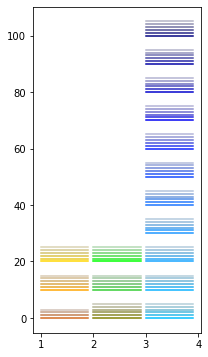

In [79]:
# check if coloring works
if True:
    plt.figure(figsize = [3, 6])
    
    # Loop though all cases

    # First loop through groups
    ## igrp is an interger number
    ## sgrp is a string
        
    for igrp in range(len(dct_all)):
        sgrp = list(dct_all)[igrp]
        #print(sgrp)


        # loop though all simulations types
        ## isim is a number!
        ## ssmin is a string
        for itype in range(len(dct_all[sgrp])):
            # get the name (string) of the simulation
            stype = list(dct_all[sgrp])[itype]
            #print("  " + stype)


            # loop though cases in correct order
            cases = list(dct_all[sgrp][stype])
            cases_num = np.array(cases, dtype = float)
            srt_idx = np.argsort(cases_num)
            sort_case = [cases[i] for i in srt_idx]

            for icase in range(len(sort_case)):
                scase = sort_case[icase]


                plt.plot([1+igrp, 1.9+igrp], [10* itype+icase , 10* itype+icase],
                         color=dct_all[sgrp][stype][scase]["color_drk"],
                         alpha=dct_all[sgrp][stype][scase]["alpha_up"],
                         label = "{} / {} / {}".format(sgrp, stype, icase))

#plt.legend()

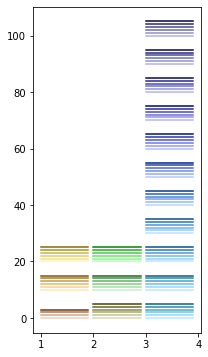

In [81]:
# check if coloring works
if True:
    plt.figure(figsize = [3, 6])
    
    # Loop though all cases

    # First loop through groups
    ## igrp is an interger number
    ## sgrp is a string
        
    for igrp in range(len(dct_all)):
        sgrp = list(dct_all)[igrp]
        #print(sgrp)


        # loop though all simulations types
        ## isim is a number!
        ## ssmin is a string
        for itype in range(len(dct_all[sgrp])):
            # get the name (string) of the simulation
            stype = list(dct_all[sgrp])[itype]
            #print("  " + stype)


            # loop though cases in correct order
            cases = list(dct_all[sgrp][stype])
            cases_num = np.array(cases, dtype = float)
            srt_idx = np.argsort(cases_num)
            sort_case = [cases[i] for i in srt_idx]

            for icase in range(len(sort_case)):
                scase = sort_case[icase]


                plt.plot([1+igrp, 1.9+igrp], [10* itype+icase , 10* itype+icase],
                         color=dct_all[sgrp][stype][scase]["color_drk"],
                         alpha = dct_all[sgrp][stype][scase]["alpha_dwn"],
                         label = "{} / {} / {}".format(sgrp, stype, icase))

#plt.legend()

# Check labeling

In [20]:
for igrp in range(len(dct_all)):
    sgrp = list(dct_all)[igrp]
    for itype in range(len(dct_all[sgrp])):
        stype = list(dct_all[sgrp])[itype]    
        for icase in range(len(dct_all[sgrp][stype])):
            scase = list(dct_all[sgrp][stype])[icase]

            
            lbl = "(" + sgrp + ") "
            if sgrp == "FDT":
                stype.split("_")
                if "noREN" in stype:
                    h1 = "$r^d_i$ = $r^a_w$ (NR)"
                elif "rwet" in stype:
                    h1 = "$r^d_i$ = $r^a_w$"
                else:
                    h1 = "$r^d_i$ = {0:2.1f}µm".format(float(stype.split("_")[-1])*1e6)

            else:
                if stype == "rwet":
                    h1 = "$r^d_i$ = $r^a_w$"
                else:
                    h1 = "$r^d_i$ = {0:2.1f}µm".format(float(stype.split("_")[-1])*1e6)

            lbl = lbl + h1

            
            dct_all[sgrp][stype][scase].update({"label": lbl})

(FDT) $r^d_i$ = 1.0µm
(FDT) $r^d_i$ = 1.0µm
(FDT) $r^d_i$ = 1.0µm
(FDT) $r^d_i$ = 1.0µm
(FDT) $r^d_i$ = $r^a_w$
(FDT) $r^d_i$ = $r^a_w$
(FDT) $r^d_i$ = $r^a_w$
(FDT) $r^d_i$ = $r^a_w$
(FDT) $r^d_i$ = $r^a_w$
(FDT) $r^d_i$ = $r^a_w$
(FDT) $r^d_i$ = $r^a_w$ (NR)
(FDT) $r^d_i$ = $r^a_w$ (NR)
(FDT) $r^d_i$ = $r^a_w$ (NR)
(FDT) $r^d_i$ = $r^a_w$ (NR)
(FDT) $r^d_i$ = $r^a_w$ (NR)
(FDT) $r^d_i$ = $r^a_w$ (NR)
(LRD) $r^d_i$ = 1.0µm
(LRD) $r^d_i$ = 1.0µm
(LRD) $r^d_i$ = 1.0µm
(LRD) $r^d_i$ = 1.0µm
(LRD) $r^d_i$ = 1.0µm
(LRD) $r^d_i$ = 1.0µm
(LRD) $r^d_i$ = 5.0µm
(LRD) $r^d_i$ = 5.0µm
(LRD) $r^d_i$ = 5.0µm
(LRD) $r^d_i$ = 5.0µm
(LRD) $r^d_i$ = 5.0µm
(LRD) $r^d_i$ = 5.0µm
(LRD) $r^d_i$ = 10.0µm
(LRD) $r^d_i$ = 10.0µm
(LRD) $r^d_i$ = 10.0µm
(LRD) $r^d_i$ = 10.0µm
(LRD) $r^d_i$ = 10.0µm
(LRD) $r^d_i$ = 10.0µm
(SMD) $r^d_i$ = 1.0µm
(SMD) $r^d_i$ = 1.0µm
(SMD) $r^d_i$ = 1.0µm
(SMD) $r^d_i$ = 1.0µm
(SMD) $r^d_i$ = 1.0µm
(SMD) $r^d_i$ = 1.0µm
(SMD) $r^d_i$ = 2.0µm
(SMD) $r^d_i$ = 2.0µm
(SMD) $r^d_i$ = 

# Load data

depends on flags 
* load_TS
* load_profile
* load_3d

In [ ]:
if False:
    if load_TS:
        for idct in list(dct_all):
            for icase in dct_all[idct]:
                # Profile Data


                if load_TS:
                    # T_S Data
                    with open(dct_all[idct][icase]["dir_TS"]) as f:
                        raw = f.read()
                    lines = raw.split("\n")
                    header = lines[0][1:].split()
                    data = np.array([[float(i) for i in (l.split())]
                                     for l in lines[1:-1]])
                    df = pd.DataFrame(data[:, 1:], index=data[:, 0])
                    df.columns = header[1:]

                    # update dict
                    dct_all[idct][icase].update({"T_S": df})

                if load_3d:  
                    ds_3d = xr.open_dataset(dct_all[idct][icase]["dir_3d"])
                    dct_all[idct][icase].update({"data_3d": ds_3d})

                if load_3d_fldvar:
                    ds_fldvar = xr.open_dataset(dct_all[idct][icase]["dir_3d_fldvar"])

                    # update dict
                    dct_all[idct][icase].update({"data_3d_fldvar": ds_fldvar})

# Debugging